In [1]:
import pandas as pd
import matplotlib.pyplot as plt



In [2]:
# Load the dataset
df = pd.read_csv('PMS DECEMBER 2024.csv')  # Change filename accordingly

# Display the first few rows
print(df.head(10))

         state  23-Dec   24-Nov   24-Dec
0         Abia  690.53  1260.66  1224.67
1        Abuja  663.33  1230.56  1102.25
2      Adamawa  745.71  1319.85  1301.33
3    Akwa Ibom  671.67  1203.93  1146.94
4      Anambra  680.00  1270.75  1238.76
5       Bauchi  675.29  1181.69  1183.48
6      Bayelsa  667.11  1209.17  1161.88
7        Benue  658.89  1365.16  1234.55
8        Borno  622.71  1331.94  1282.38
9  Cross River  679.00  1218.54  1228.19


In [3]:
df.dtypes

state      object
23-Dec    float64
24-Nov    float64
24-Dec    float64
dtype: object

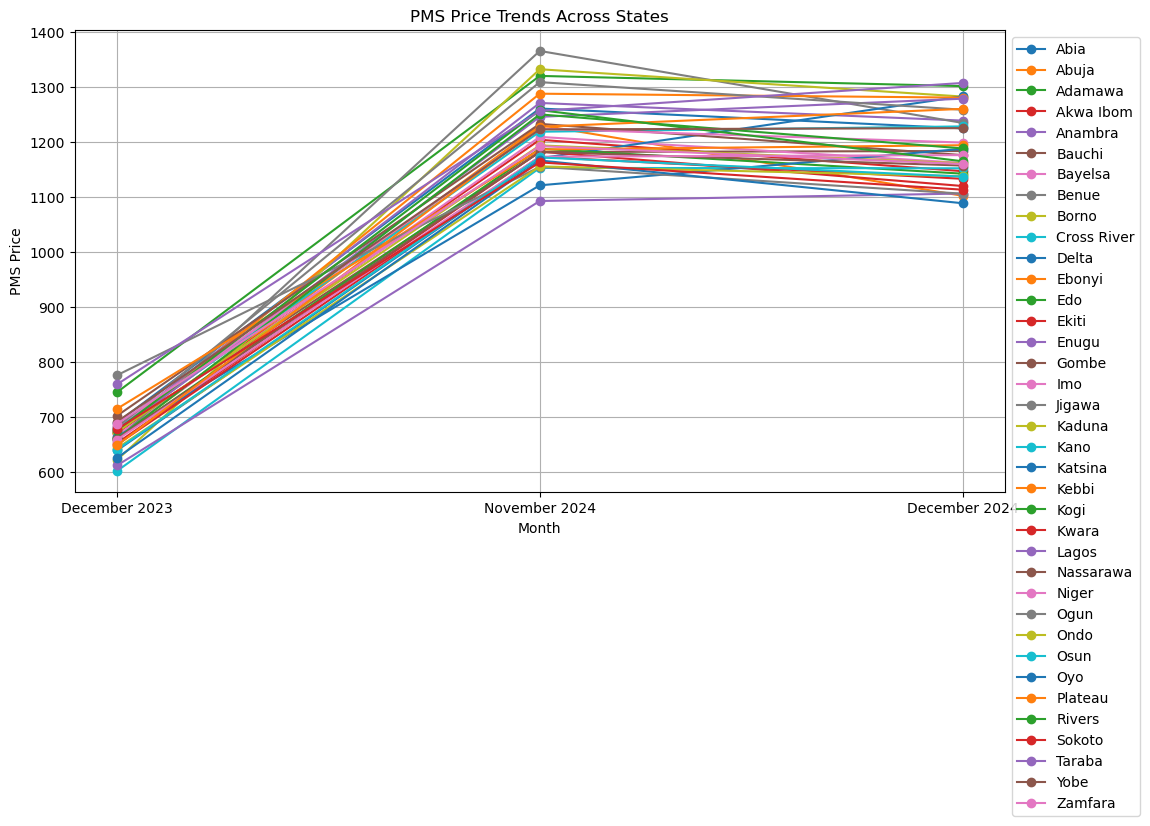

In [4]:
plt.figure(figsize=(12, 6))

for state in df["state"]:
    state_data = df[df["state"] == state]
    plt.plot(["December 2023", "November 2024", "December 2024"], 
             [state_data.iloc[0, 1], state_data.iloc[0, 2], state_data.iloc[0, 3]], 
             marker='o', label=state)

plt.xlabel("Month")
plt.ylabel("PMS Price")
plt.title("PMS Price Trends Across States")
plt.legend(loc="upper left", bbox_to_anchor=(1,1))
plt.grid(True)
plt.show()


In [5]:
df["Change_Dec23_to_Dec24"] = df["24-Dec"] - df["23-Dec"]
df["Change_Nov24_to_Dec24"] = df["24-Dec"] - df["24-Nov"]

print(df.describe())  # Get summary statistics


           23-Dec       24-Nov       24-Dec  Change_Dec23_to_Dec24  \
count   37.000000    37.000000    37.000000              37.000000   
mean   671.858919  1214.168378  1189.121351             517.262432   
std     35.780270    59.194070    62.113628              62.951382   
min    602.780000  1092.790000  1088.750000             329.530000   
25%    653.440000  1173.060000  1142.400000             480.520000   
50%    671.430000  1203.930000  1176.130000             508.190000   
75%    682.000000  1249.980000  1234.550000             549.360000   
max    776.540000  1365.160000  1307.050000             659.670000   

       Change_Nov24_to_Dec24  
count              37.000000  
mean              -25.047027  
std                48.435565  
min              -130.610000  
25%               -49.560000  
50%               -32.310000  
75%                 2.270000  
max               112.350000  


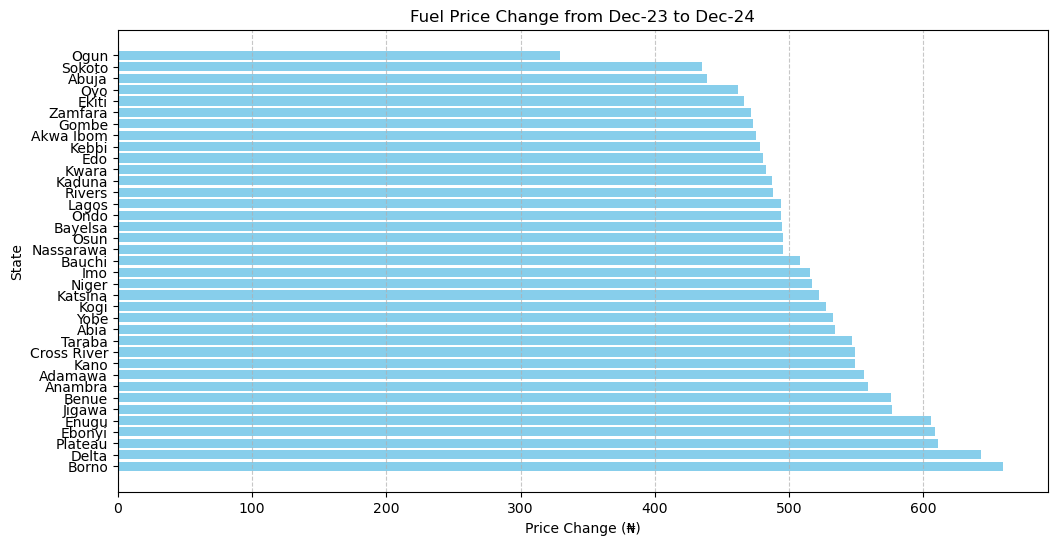

In [6]:
import seaborn as sns

# Sort by change for better visualization
df_sorted = df.sort_values(by="Change_Dec23_to_Dec24", ascending=False)

plt.figure(figsize=(12, 6))
plt.barh(df_sorted["state"], df_sorted["Change_Dec23_to_Dec24"], color="skyblue")
plt.xlabel("Price Change (₦)")
plt.ylabel("State")
plt.title("Fuel Price Change from Dec-23 to Dec-24")
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.show()


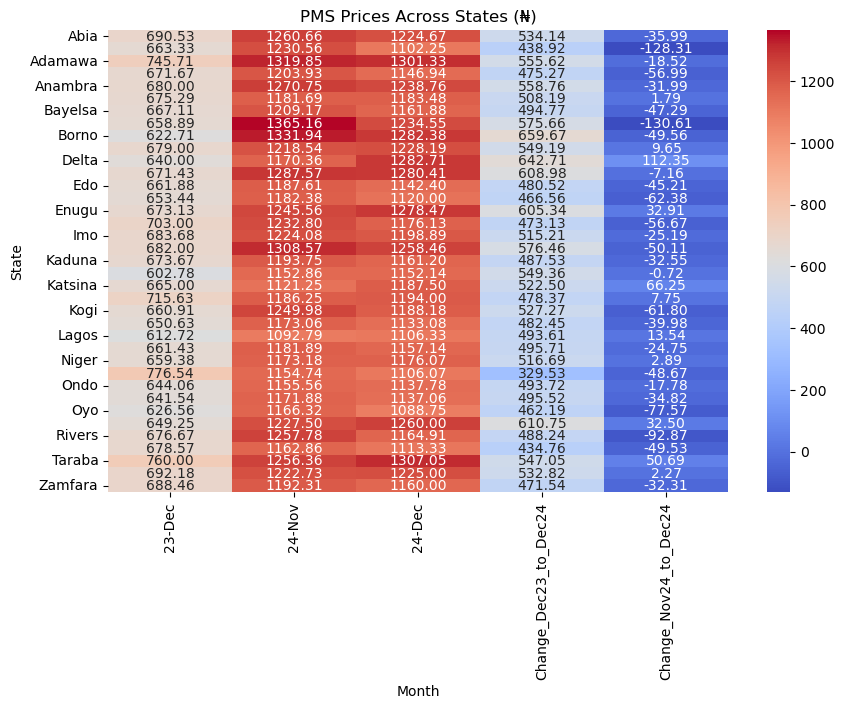

In [7]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.iloc[:, 1:].set_index(df["state"]), cmap="coolwarm", annot=True, fmt=".2f")
plt.title("PMS Prices Across States (₦)")
plt.xlabel("Month")
plt.ylabel("State")
plt.show()
